First, handle our imports.

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import resample

We declare a function, clean_comment, to regex and tokenize comments.

In [42]:
stop_words = set(stopwords.words("english"))

def clean_comment(comment):
    ps = PorterStemmer()
    regex = re.compile('[^ a-zA-Z]')
    cleaned_comment = regex.sub('', comment)
    tokenized_words = word_tokenize(cleaned_comment.lower())
    cleaned_comments = []

    for word in tokenized_words:
        if word not in stop_words:
            cleaned_comments.append(ps.stem(word))

    return cleaned_comments

We start by creating a df of our training data.

In [ ]:
df = pd.read_csv('stock_data.csv', sep=',', encoding='latin-1')

Let us look into class balance in the above df.

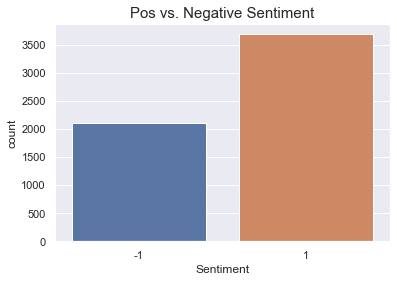

In [43]:
plt.figure(figsize = None)
sns.set_theme(style="darkgrid")
sns.countplot(x="Sentiment", data=df)
plt.title("Pos vs. Negative Sentiment", fontsize = 15)
plt.show()

Based on the above, we need to upsample our negative sentiment.

In [ ]:
df_majority = df[df['Sentiment'] == 1]
df_minority = df[df['Sentiment'] == -1]

minority_upsample = resample(df_minority, replace = True, n_samples = df_majority.shape[0], random_state=101)

df_upsampled = pd.concat([minority_upsample, df_majority])
df_upsampled = df_upsampled.sample(frac=1)

Check our upsample

In [ ]:
plt.figure(figsize = None)
sns.set_theme(style="darkgrid")
sns.countplot(x="Sentiment", data=df_upsampled)
plt.title("Pos vs. Negative Sentiment", fontsize = 15)
plt.show()